<a href="https://colab.research.google.com/github/nishantkapps/aiml-projects/blob/main/ICMR_Early_Cancer_Identification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import fastcluster as fc

In [ ]:
! pip install fastcluster

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 KB 4.9 MB/s eta 0:00:00


# Read data and labels & merge the datasets

In [ ]:
main_path = '/content/drive/MyDrive/datasets/early-cancer-detection'
datacsv = os.path.join(main_path,'data.csv')
labelscsv = os.path.join(main_path,'labels.csv')

In [ ]:
data = pd.read_csv(datacsv)
labels = pd.read_csv(labelscsv)

In [ ]:
df = pd.merge(data,labels, on='Unnamed: 0')

In [ ]:
df.head()

,Unnamed: 0,gene_0,gene_1,gene_2,gene_3,gene_4,gene_5,gene_6,gene_7,gene_8,...,gene_20522,gene_20523,gene_20524,gene_20525,gene_20526,gene_20527,gene_20528,gene_20529,gene_20530,Class
0,sample_0,0.0,2.017209,3.265527,5.478487,10.431999,0.0,7.175175,0.591871,0.0,...,8.210257,9.723516,7.220030,9.119813,12.003135,9.650743,8.921326,5.286759,0.0,PRAD
1,sample_1,0.0,0.592732,1.588421,7.586157,9.623011,0.0,6.816049,0.000000,0.0,...,7.323865,9.740931,6.256586,8.381612,12.674552,10.517059,9.397854,2.094168,0.0,LUAD
2,sample_2,0.0,3.511759,4.327199,6.881787,9.870730,0.0,6.972130,0.452595,0.0,...,8.127123,10.908640,5.401607,9.911597,9.045255,9.788359,10.090470,1.683023,0.0,PRAD
3,sample_3,0.0,3.663618,4.507649,6.659068,10.196184,0.0,7.843375,0.434882,0.0,...,8.792959,10.141520,8.942805,9.601208,11.392682,9.694814,9.684365,3.292001,0.0,PRAD
4,sample_4,0.0,2.655741,2.821547,6.539454,9.738265,0.0,6.566967,0.360982,0.0,...,8.891425,10.373790,7.181162,9.846910,11.922439,9.217749,9.461191,5.110372,0.0,BRCA


# Plot the merged dataset as a hierarchically clustered heatmap

In [ ]:
datamrg = df.iloc[:,1:-1]

In [ ]:
hier = fc.linkage(datamrg)

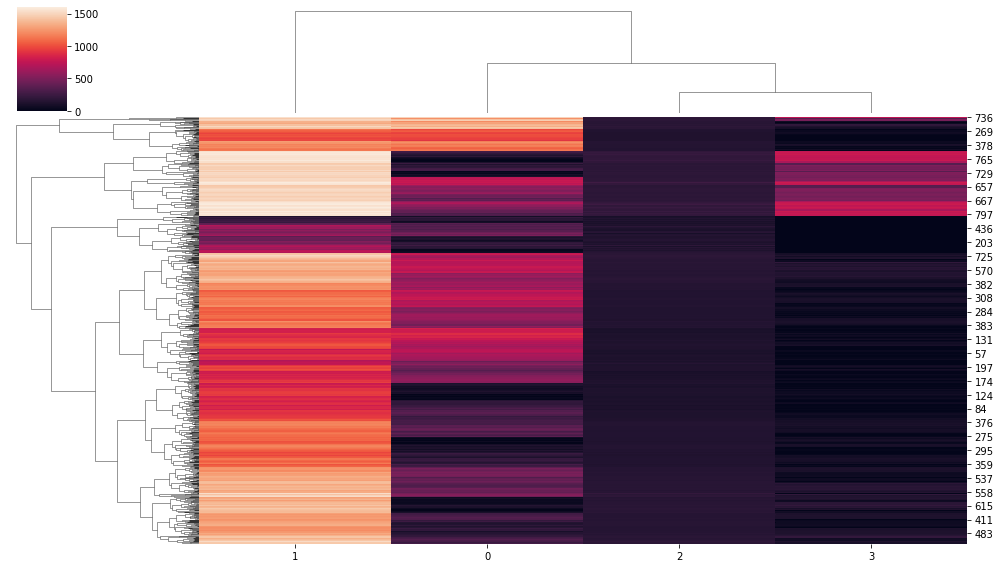

In [ ]:
sns.clustermap(hier, figsize=(14, 8))

# Null Hypothesis Testing

In [ ]:
from scipy.stats import f_oneway
from sklearn.preprocessing import LabelEncoder

In [ ]:
from scipy import stats
grps = pd.unique(df['Class'].unique())
d_data = { grp : df[df['Class'] == grp]['gene_0'] for grp in grps }
F, p = stats.f_oneway(d_data['PRAD'], d_data['LUAD'], d_data['BRCA'],d_data['KIRC'],d_data['COAD'])
print("p-value for significance is: ", p)
if p < 0.05: print("reject null hypothesis")
else: print("accept null hypothesis")

p-value for significance is:  0.07505540778266195
accept null hypothesis


# Dimensionality Reduction using the following algorithms

<li> PCA
<li> LDA
<li> t-SNE




In [ ]:
from sklearn.decomposition import PCA, LatentDirichletAllocation
from sklearn.model_selection import train_test_split

In [ ]:
x = df.iloc[:,1:-1]
y = df.iloc[:,-1]
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.7)

In [ ]:
pca = PCA(n_components=0.95, svd_solver='full')
pca.fit(x_train,y_train)

PCA(n_components=0.95, svd_solver='full')

In [ ]:
pca.explained_variance_ratio_

array([0.1709429 , 0.10729403, 0.09996461, 0.0584023 , 0.03882354,
       0.03441939, 0.0252601 , 0.01796396, 0.0155898 , 0.01363636,
       0.01110863, 0.01001828, 0.00835574, 0.00809987, 0.00737461,
       0.00681369, 0.00659694, 0.00632151, 0.00572076, 0.00570388,
       0.00538438, 0.00515832, 0.00510993, 0.00479899, 0.00473131,
       0.00460381, 0.0044206 , 0.0043242 , 0.00412756, 0.00402612,
       0.00396144, 0.00390461, 0.00370282, 0.00368916, 0.00360157,
       0.00355359, 0.00348955, 0.00340707, 0.0032883 , 0.00323014,
       0.00314402, 0.0031176 , 0.00307408, 0.00303255, 0.00297367,
       0.00291724, 0.00289386, 0.0028871 , 0.00275691, 0.00268951,
       0.00267113, 0.00265862, 0.00263509, 0.00257309, 0.00253876,
       0.00251818, 0.00251162, 0.00246511, 0.00243377, 0.00237005,
       0.00233875, 0.00232825, 0.00225859, 0.0022418 , 0.00222676,
       0.00221962, 0.00218771, 0.00214448, 0.00213242, 0.00209099,
       0.00207221, 0.00204259, 0.00202751, 0.00201263, 0.00199